# Classification of bacteria among ten species using different supervised learning models

Erasmus Students from Institut National des Sciences Appliquées de Toulouse, France : **Quentin DOUARRE , Hennrick Morgan PELLOUX**

The idea of this project comes from the article "Analysis of Identification Method for Bacterial Species and Antibiotic Resistance Genes Using Optical Data From DNA Oligomers" published in the journal Frontiers in Microbiology, in 2020.

The article is available at the following address : [Analysis of Identification Method for Bacterial Species and Antibiotic Resistance Genes Using Optical Data From DNA Oligomers](https://www.frontiersin.org/articles/10.3389/fmicb.2020.00257/full)

The dataset that we have used is available at the following address : [Bacteria Dataset](https://www.kaggle.com/competitions/tabular-playground-series-feb-2022/data)

In the medical field in order to properly diagnose and treat a patient, identifying an infectious agent is essential to properly treat the case. 
Identifying bacterias used to be done by comparing found DNA segments to ones that are known, and this was done by humans which unfortunately could lead to some error and could take some time. Thus taking advantage of the power offered by supervised Machine Learning can be a great opportunity to ease the medical staff's charge of works and treat patients more effectively and at a better rate. However, being in the medical field means that human lives could potentially be at stakes and that is not a matter to take lightly. The accuracy and the reliability of the results must then be as high as possible to minimize errors and potential heavy consequences.

In our case, we want to classify bacterias in different categories using multiple features and as stated before, since this is a critical use, explainability and interpretability should be taken into account in order to provide results that are exploitable and understandable by medical professionnals. We also must have the highest possible accuracy of results with both very low rates of false positives and false negatives in order to not miss classify a bacteria, which could lead to misstreatment of a patient.

Since multiple approaches are available to us, we chose to explore 3 different Machine Learning algorithms with each their own advantages and drawbacks : **KNN**, **Random Forest** and **Neural Networks**. After training and analysing their results and characteristics we will compare them and chose the one that best fits this problem regarding what's at stake.

# OUTLINE

- ## Libraries import

- ## Preprocessing
1) remove missing data
2) extract X and y
3) replace bacteria's names with numbers
4) Split training (64%), validation (16%) and test set (20%)  (with the cross validation and the learning curves, there is already the creation of the validation set) 
5) data normalization using Z-norm 

- ## Models creation
1) Model selection : KNN, Random forest and MLP 
2) First score estimation for each model 

- ### KNN
0) Explanation of the principle behind this model 
1) Bias and Variance : impact of each parameter 
2) Hyper parameter tuning from scratch 
3) Automatic hyper parameter tuning with GridSearchCV 
4) Validation curves : analysis underfitting/overfitting 

- ### Random Forest
0) Explanation of the principle behind this model 
1) Bias and Variance : impact of each parameter 
2) Validation curve : analysis underfitting/overfitting 
3) Automatic hyper parameter tuning with GridSearchCV 
4) Display of decision trees (for interpretability) 

TO DO : Discussion concerning the method that allows the selection of the feature entropy/gini

- ### MLP
0) Explanation of the principle behind this model 
1) Discussion about the architecture 
2) Bias and Variance : impact of each parameter 
3) Validation curve : analysis underfitting/overfitting 
4) Automatic hyper parameter tuning with GridSearchCV 

- ## Result comparison
1) Confusion Matrix 
2) Precision and Accuracy 
3) ROC 
4) Complexity of each model and time computation 


- ## Interpretability discussion
0) Medical context and importance of stakes concerning interpretability of ML models
1) Complexity and score tradeoff 
2) Interpretability of each model (underlign features selection, especially on the random forest model)
3) Conclusion 

To see : model methods and interpretable methods

- ##  Challenge : detection of turberculose and aerogenese

<span style="color:red">**We haven't K. aerogenes and M. tuberculosis in the available dataset** </span>
Note : see Fig 6.



# Libraries import

In [1]:
# Machine Learning Importation
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_decision_regions

# Models importation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
# Importation of the dataset
data = pd.read_csv ('bacteria.csv')

# Preprocessing

In [3]:
# delete all incomplete data
data.dropna(axis=0, inplace=True)

# replacement of all bacteria names with numbers
data['target'].replace(['Streptococcus_pyogenes',
                        'Salmonella_enterica',
                        'Enterococcus_hirae',
                        'Streptococcus_pneumoniae',
                        'Staphylococcus_aureus',
                        'Klebsiella_pneumoniae',
                        'Bacteroides_fragilis',
                        'Escherichia_coli',
                        'Campylobacter_jejuni',
                        'Escherichia_fergusonii'],
                      [0,1,2,3,4,5,6,7,8,9], inplace=True)

# print first data
data.head()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,0
1,1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,1
2,2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,1
3,3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,1
4,4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,2


In [4]:
# remove the first and the last column
X = data.drop(['target', 'row_id'], axis=1)

# extraction of the last column
y = data['target']

In [5]:
# Split dataset into two parts: training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Split training set into two parts: training set and validation set
X_train_splitted, X_val, y_train_splitted, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

**Z-score normalization** :

We normalize the data by scaling it to unit variance by using the formula : $z=$ $\frac{(x - u)}{s}$

Where $u$ is the mean of training sample and $s$ is the standard deviation of the training samples.

In [6]:
# Scale X_train, X_val, X_test using Z-score normalization
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_train_splitted_scaled = sc.fit_transform(X_train_splitted)
X_val_scaled = sc.fit_transform(X_val)
X_test_scaled = sc.fit_transform(X_test)

<span style="color:blue">*Explaining why we have chosen these three models*</span>
Discussion about the nature of the problem, complexity and interpretability

We have chosen for this project to analyse three different models, KNN, Random Forest and Neural Network because they are really different on several important points in machine learning. Some are more interpretable than the others, others are more complex. At the end of our project, we have analysed deeply the complexity and interpretability of each model and we have compared between them.

In [8]:
# Adding the models to be tested
models_list = []
models_list.append(KNeighborsClassifier())
models_list.append(DecisionTreeClassifier())
models_list.append(RandomForestClassifier())
models_list.append(MLPClassifier(random_state=42, max_iter=2000))

In [9]:
import time

score_list_train = []
score_list_val = []
execution_time = []
models_tested = ['KNN', 
                 'Decision Tree', 
                 'Random Forest',
                 'MLP'
                 ]

for model in models_list:

    # start computing time
    st = time.time()

    # training
    model.fit(X_train_splitted_scaled, y_train_splitted) 
    et = time.time()

    # compute the execution time
    elapsed_time = et - st

    score_list_train.append(model.score(X_train_splitted_scaled, y_train_splitted))
    score_list_val.append(model.score(X_val_scaled, y_val))
    execution_time.append(elapsed_time)
    

In [10]:
result = pd.DataFrame({'Model':models_tested, 'Train score':score_list_train, 
                       'Test score':score_list_val, 'Execution Time':execution_time})

# print the result
result

,Model,Train score,Test score,Execution Time
0,KNN,1.000000,0.987156,0.335388
1,Decision Tree,1.000000,0.951313,20.567937
2,Random Forest,1.000000,0.990469,74.719966
3,MLP,0.997461,0.984500,129.116718


For now, we can see that the best model for classifying correctly bacteria among ten species is the random forest in terms of score. However, the others have excellent score. Each model has its own characteristics. We have to analyse more in detail the specificities of each of them in the next parts to give a better answer to solve the problem.

# **KNN**

## 0. Explanation of the principle behind this model 

The **KNN** describes the K-Nearest Neighbors algorithm and is a **supervised machine learning classification algorithm**.
To classify new data, its distance to the features of the classified data is computed and it is put in the **predominant class** (class with the most selected neighbors) in the K nearest neighbors.
Depending on the type of weighting, the predominant class can be the class that accumulates the most neighbors or the class with the most and closest neighbors.

It is considered a relatively simple and lightweight Machine Learning model in terms of complexity.

<img src="images/knn.png" alt="KNN algorithm explanation" width="800"/>\
*https://www.ibm.com/it-it/topics/knn*

We use 2 ways to evaluate the distance :
- **Manhattan distance** or L1 : $\sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$
- **Euclidian distance** or L2 : $\sum_{i=1}^{n} |x_i - y_i|$

In this type of model, the most impacting parameter is **K** : the number of neighbors to consider.

## 1. Bias and Variance : impact of each parameter 

The K number of neighbors greatly impacts both **Bias** and **Variance**. In theory, when K has a small value, the Variance is high *(overfitting)* and when K has a large value the Bias is high *(underfitting)*.
Thus, both Bias and Variance cannot be low and the the value of K must be selected to find a good trade-off between the Bias and the Variance.

## 2. Hyper parameter tuning from scratch

As we have ten different bacteria species, we have not to choose a K number multiple of the class number to avoid indetermination for the output of the model. So, we have to parameterize K as an odd number.

In [11]:
n_neighbors = [1,3,5,7] # number k of neighbors 
weights = ['uniform', 'distance'] # weight function used in prediction
p = [1,2] 

score_list_train_all = []
score_list_val_all = []
execution_time_all = []
n_neighbors_all = []
weights_all = []
p_all = []

# Hyperparameter tuning for KNN from scratch
for n in n_neighbors:
    for w in weights:
        for pp in p:
            st = time.time()
            model = KNeighborsClassifier(n_neighbors=n, weights=w, p=pp)
            model.fit(X_train_splitted_scaled, y_train)
            et = time.time()
            elapsed_time = et - st
            score_list_train_all.append(model.score(X_train_splitted_scaled, y_train))
            score_list_val_all.append(model.score(X_val_scaled, y_val))
            execution_time_all.append(elapsed_time)
            n_neighbors_all.append(n)
            weights_all.append(w)
            p_all.append(pp)
            result_all = pd.DataFrame({'Model':'KKN', 'Train score':score_list_train_all,
                                   'Test score':score_list_val_all, 'Execution Time':execution_time_all, 'n_neighbors':n_neighbors_all, 'weights':weights_all, 'p': p_all})
print(result_all)

   Model  Train score  Test score  Execution Time  n_neighbors   weights  p
0    KKN     1.000000    1.000000        0.279999            1   uniform  1
1    KKN     1.000000    1.000000        0.258999            1   uniform  2
2    KKN     1.000000    1.000000        0.247001            1  distance  1
3    KKN     1.000000    1.000000        0.318001            1  distance  2
4    KKN     0.993225    0.993812        0.248001            3   uniform  1
5    KKN     0.992200    0.992656        0.260000            3   uniform  2
6    KKN     1.000000    1.000000        0.249000            3  distance  1
7    KKN     1.000000    0.999812        0.258001            3  distance  2
8    KKN     0.981925    0.983000        0.248003            5   uniform  1
9    KKN     0.979094    0.980219        0.253000            5   uniform  2
10   KKN     1.000000    1.000000        0.251000            5  distance  1
11   KKN     1.000000    0.999781        0.250001            5  distance  2
12   KKN    

## 3. Automatic hyper parameter tuning with GridSearchCV 

In [13]:
# Automatic hyperparameter tuning for KNN
param_grid_KNN = {'n_neighbors' : [1,3,5,7],
              'weights' : ['uniform', 'distance'],
              'p' : [1, 2] # p=1 : manhattan_distance, p=2 : euclidean_distance
              }

grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid_KNN, cv=5) # 5-fold cross validation
grid_KNN.fit(X_train_scaled, y_train)

print("Best score:", grid_KNN.best_score_)
print("Param:", grid_KNN.best_params_)



Best score: 0.988025
Param: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


In [14]:
# Train the best model for KNN
best_KNN_model = KNeighborsClassifier(n_neighbors=grid_KNN.best_params_['n_neighbors'], weights=grid_KNN.best_params_['weights'], p=grid_KNN.best_params_['p'])
best_KNN_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

In [ ]:
# Plot decision region 
plot_decision_regions(X_train_scaled, y_train, clf=best_KNN_model, legend=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('KNN decision region')
plt.show()

## 4. Validation curve : analysis underfitting/overfitting 

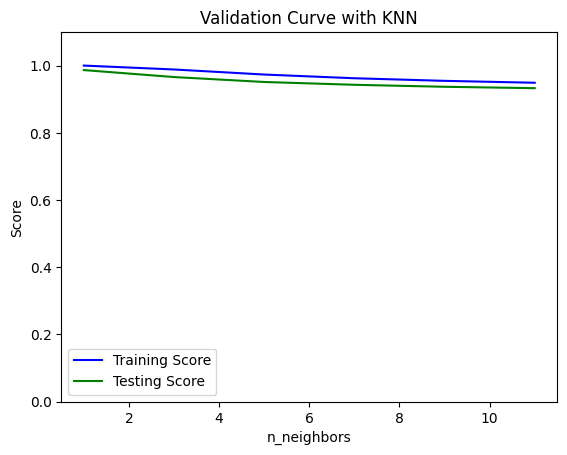

In [17]:
# Validation curve for KNN on n_neighbors: number K of neighbors 

param_K_range = [1,3,5,7,9,11]
train_scores_KNN, test_scores_KNN = validation_curve(KNeighborsClassifier(), X_train_scaled, y_train, param_name="n_neighbors", param_range=param_K_range, cv=5) # 5-fold cross validation

train_scores_mean_KNN = np.mean(train_scores_KNN, axis=1) # mean of the training scores
train_scores_std_KNN = np.std(train_scores_KNN, axis=1) # standard deviation of the training scores
test_scores_mean_KNN = np.mean(test_scores_KNN, axis=1) # mean of the test scores
test_scores_std_KNN = np.std(test_scores_KNN, axis=1) # standard deviation of the test scores

plt.plot(param_K_range, train_scores_mean_KNN,
     label = "Training Score", color = 'b')
plt.plot(param_K_range, test_scores_mean_KNN,
   label = "Testing Score", color = 'g')

plt.title("Validation Curve with KNN")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.legend(loc="best")
plt.show()


We can see on the **Validation curve** of the KNN that we have the best score with the lowest value of K, being 1. As explained earlier, with a high value of K the **Bias** increases, which explains the decrease in the score with greater values of K. However we can see that for K=1, despite having a low value of K and thus in theory a greater **Variance**, both the Training and Testing scores are still pretty high and close to each other.
This could be explained by the fact that the data among different classes are quite distinctively seperated between their groups.

# **Random Forest**

0) Explanation of the principle behind this model 
1) Bias and Variance : impact of each parameter 
2) Validation curve : analysis underfitting/overfitting 
3) Automatic hyper parameter tuning with GridSearchCV 
4) Display of decision trees (for interpretability) 

A random forest is a supervised learning model in Machine Learning. It is composed of several decision trees, hence its name, and it is very effective for classification problems. The idea behind this model is to create decision trees from an original dataset and to evaluate a new data for each tree. The majority result is the output of the random forest. To do that, firstly, we create bootstrapped datasets using random data from the original dataset. (a data can be several times on a same bootstrapped dataset). Once we have several bootstrapped datasets (normally around one hundred), we select randomly a number of features to build decision trees at each step of the building. The best feature at each step is selected thanks to selection criterias like entropy or gini index. Each tree is different from the others. 

With our set of trees, we can continue with the aggregation stage by comparing the result of each tree with a new data.

Bootstrapping + Aggregating = Bagging 

<span style="color:blue">*Explain Bagging term*</span>

The majority result is the output of the random forest.

It is important to determine correctly the number of trees and the maximum depth of each of them to avoid underfitting and overfitting.

If we choose a too high number of trees and maximum depth number, we risk overfitting (high variance). On the other hand, with a too small number of trees and maximum depth, we risk underfitting (high bias)

<span style="color:red">*We analyse that with the validation curve*</span>

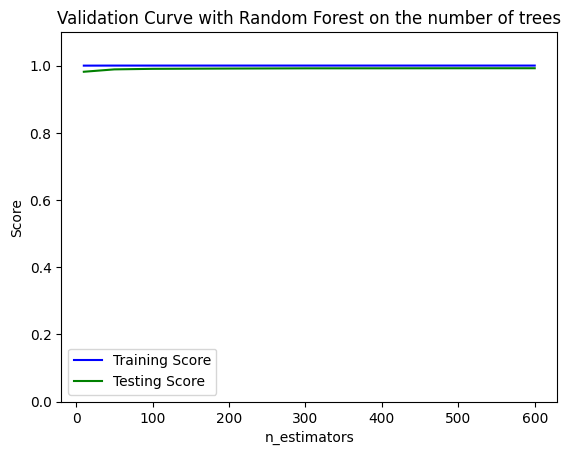

In [8]:
# Validation curve for Random Forest on n_estimators: number of trees in the forest
param_n_estimators_range = [10, 50, 100, 200, 300, 400, 500, 600]
train_scores_RF, test_scores_RF = validation_curve(RandomForestClassifier(), X_train_scaled, y_train, param_name="n_estimators", param_range=param_n_estimators_range, cv=5) # 5-fold cross validation

train_scores_mean_RF = np.mean(train_scores_RF, axis=1) # mean of the training scores
train_scores_std_RF = np.std(train_scores_RF, axis=1) # standard deviation of the training scores
test_scores_mean_RF = np.mean(test_scores_RF, axis=1) # mean of the test scores
test_scores_std_RF = np.std(test_scores_RF, axis=1) # standard deviation of the test scores

plt.plot(param_n_estimators_range, train_scores_mean_RF,
     label = "Training Score", color = 'b')
plt.plot(param_n_estimators_range, test_scores_mean_RF,
   label = "Testing Score", color = 'g')

plt.title("Validation Curve with Random Forest on the number of trees")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.legend(loc="best")
plt.show()

We can see here on the **validation curve** on different numbers of trees in the forest that we already have a really good score with a relatively low number of trees. Starting at 10 trees we already don't have any underfitting and above 50 trees we see very little improvement in the test score. In theory the number of trees should affect the overfitting but it doesn't seem to be the case here, unless it appears with a very large number of trees that we have not explored. But the absence of overfitting with the increase of the number of trees could potentially happen if the dataset has classes distinctively separated between each other and little to no overfitting seem to occur. 

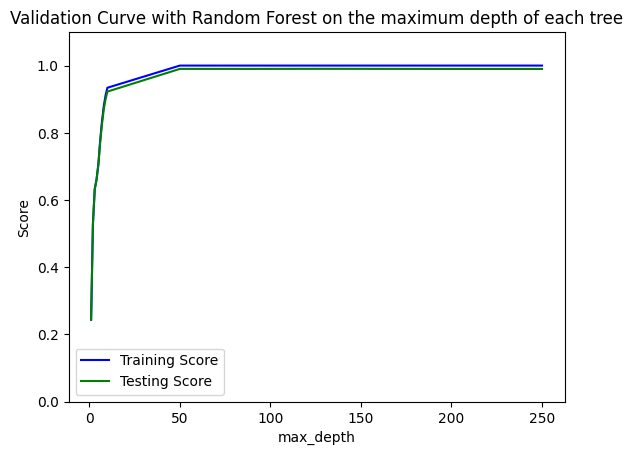

In [9]:
# Validation curve for Random Forest on max_depth: maximum depth of the tree
param_max_depth_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 90, 130, 170, 210, 250]
train_scores_RF2, test_scores_RF2 = validation_curve(RandomForestClassifier(), X_train_scaled, y_train, param_name="max_depth", param_range=param_max_depth_range, cv=5) # 5-fold cross validation

train_scores_mean_RF2 = np.mean(train_scores_RF2, axis=1) # mean of the training scores
train_scores_std_RF2 = np.std(train_scores_RF2, axis=1) # standard deviation of the training scores
test_scores_mean_RF2 = np.mean(test_scores_RF2, axis=1) # mean of the test scores
test_scores_std_RF2 = np.std(test_scores_RF2, axis=1) # standard deviation of the test scores

plt.plot(param_max_depth_range, train_scores_mean_RF2,
     label = "Training Score", color = 'b')
plt.plot(param_max_depth_range, test_scores_mean_RF2,
   label = "Testing Score", color = 'g')

plt.title("Validation Curve with Random Forest on the maximum depth of each tree")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.legend(loc="best")
plt.show()


On the **validation curve** on the maximum depth of each tree of the forest we can clearly see some underfitting when the depth is very low. At a depth of around 50 there seem to be little underfitting and the model starts to perform very well. Up to depths of 250 there doesn't seem to be overfitting even though this parameter should lead to overfitting in theory for **Random Forests**. Like explained earlier for the validation curve on the number of trees in the forest, the overfitting could appear with much higher values of depths of trees, and this could be because we have a very clean dataset.

In [10]:
# Automatic hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV

param_grid_random_forest = {'n_estimators' : [100, 200, 300],
              'criterion' : ['gini', 'entropy'],
              'max_depth' : [10, 50, 100, 200, 250, 280]
              }

grid_random_forest = GridSearchCV(RandomForestClassifier(), param_grid_random_forest, cv=5) # 5-fold cross validation
grid_random_forest.fit(X_train_scaled, y_train)

print("Best score:", grid_random_forest.best_score_)
print("Param:", grid_random_forest.best_params_)

Best score: 0.9917875
Param: {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 300}


[Text(0.45629457195244266, 0.9945054945054945, 'X[225] <= -0.737\ngini = 0.9\nsamples = 100994\nvalue = [15917, 15943, 16072, 16027, 15881, 15830, 16271, 15845\n16210, 16004]'),
 Text(0.13755955666565314, 0.9835164835164835, 'X[16] <= 0.987\ngini = 0.775\nsamples = 28427\nvalue = [392, 10527, 318, 576, 114, 11586, 915, 10274, 151\n10116]'),
 Text(0.09231172893027931, 0.9725274725274725, 'X[242] <= -0.318\ngini = 0.752\nsamples = 21848\nvalue = [392, 9421, 318, 576, 114, 2766, 902, 9901, 151, 9957]'),
 Text(0.04955563829685496, 0.9615384615384616, 'X[82] <= 0.189\ngini = 0.693\nsamples = 13498\nvalue = [146, 8663, 57, 106, 15, 2483, 263, 7281, 14, 2275]'),
 Text(0.028064473309888743, 0.9505494505494505, 'X[203] <= -0.4\ngini = 0.538\nsamples = 5660\nvalue = [145, 927, 47, 91, 15, 195, 222, 5842, 14, 1485]'),
 Text(0.01896432270841476, 0.9395604395604396, 'X[12] <= 0.43\ngini = 0.794\nsamples = 1390\nvalue = [127, 776, 47, 84, 4, 173, 211, 353, 14, 411]'),
 Text(0.016245467819606254, 0.9

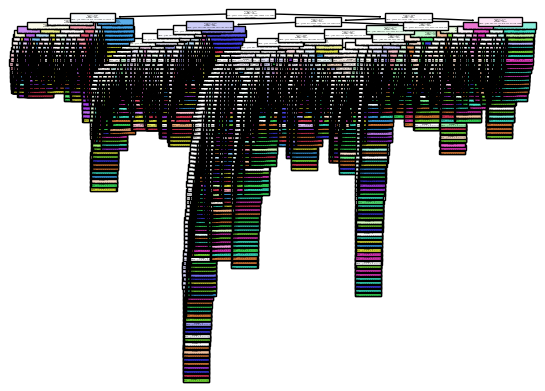

In [11]:
# Best random forest model
best_random_forest = grid_random_forest.best_params_
best_random_forest_model = RandomForestClassifier(n_estimators=best_random_forest['n_estimators'], criterion=best_random_forest['criterion'], max_depth=best_random_forest['max_depth'])
best_random_forest_model.fit(X_train_scaled, y_train)

# print the three first trees of the random forest
from sklearn import tree
tree.plot_tree(best_random_forest_model.estimators_[0], filled=True)

In [ ]:
# Plot decision regions of the best random forest model

plot_decision_regions(X_train_scaled, y_train, clf=best_random_forest_model, legend=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Forest decision region')
plt.show()




# **Neural network**

## 0. Explanation of the principle behind this model 

**Neural Networks** are a subset of machine learning inspired by the human brain in the way biological **neurons** sends signals between each other. In a Neural Network, each **neuron** or **node** receives one or multiple **inputs**, computes its values and sends it to one or multiple **outputs**. Nodes are arranged in **layers** whose nodes communicates with nodes of other layers with an associated **weigth** and threshold. There are usually an **input layer**, an **output layer** and eventually one or multiple **hidden layers** in between. The network takes data as input and through a **backpropagation algorithm** and then the **weights** of the nodes are adjusted to lower the error with the known output.

<img src="images/neural_network.webp" alt="Neural Network example" width="600"/>

*https://www.ibm.com/cloud/learn/neural-networks*

## 1. Discussion about the architecture 

In our case we are facing a classification problem, so the **output layer** of our Neural Network will have a node for each class of bacteria we have to identify, which leaves us with 10 nodes. Each node will return 0 if according to our model the input data does not belong to its class or 1 otherwise, and we should only have one positive output.

Regarding the **input layer** we will have a node for each individual feature of our dataset.

In order to find the correct architecture of our hidden layers we use *hyperparameter tuning*, since the complexity of computation of the Neural Network increases with its number and sizes of layers, we chose to only have 3 hidden layers for this problem and layers sizes between 10 and 100.

Regarding the activation function used in the Neural Network we use either *tanh* or *relu* which are commnly used and advised for classification problems. The one used for the final model will be chosen by the results of the hyperparameter tuning step.

## 2. Bias and Variance : impact of each parameter 

## 3. Validation curve : analysis underfitting/overfitting  

In [7]:
# Validation curve for neural network on number of hidden layers 

param_n_layers = [(10), (10, 10), (10, 10, 10), (10, 10, 10, 10, 10)]
train_scores_NN, test_scores_NN = validation_curve(MLPClassifier(), X_train_scaled, y_train, param_name="hidden_layer_sizes", param_range=param_n_layers, cv=5) # 5-fold cross validation

train_scores_mean_NN = np.mean(train_scores_NN, axis=1) # mean of the training scores
train_scores_std_NN = np.std(train_scores_NN, axis=1) # standard deviation of the training scores
test_scores_mean_NN = np.mean(test_scores_NN, axis=1) # mean of the test scores
test_scores_std_NN = np.std(test_scores_NN, axis=1) # standard deviation of the test scores

c:\Users\momop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\momop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\momop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\momop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

In [8]:
# Validation curve for neural network on size of hidden layers 

param_layers_sizes = [(10), (30), (50), (70), (90)]
train_scores_NN, test_scores_NN = validation_curve(MLPClassifier(), X_train_scaled, y_train, param_name="hidden_layer_sizes", param_range=param_layers_sizes, cv=5) # 5-fold cross validation

train_scores_mean_NN = np.mean(train_scores_NN, axis=1) # mean of the training scores
train_scores_std_NN = np.std(train_scores_NN, axis=1) # standard deviation of the training scores
test_scores_mean_NN = np.mean(test_scores_NN, axis=1) # mean of the test scores
test_scores_std_NN = np.std(test_scores_NN, axis=1) # standard deviation of the test scores

c:\Users\momop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\momop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\momop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\momop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

In [ ]:
# Plotting of validation curve for neural network on number of hidden layers 
plt.plot(tuple(map(str, param_n_layers)), train_scores_mean_NN,
     label = "Training Score", color = 'b')
plt.plot(tuple(map(str, param_n_layers)), test_scores_mean_NN,
   label = "Testing Score", color = 'g')

plt.title("Validation Curve with Neural Network")
plt.xlabel("n_layers")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.legend(loc="best")
plt.show()

In [ ]:
# Plotting of validation curve for neural network on size of hidden layers 
plt.plot(tuple(map(str, param_layers_sizes)), train_scores_mean_NN,
     label = "Training Score", color = 'b')
plt.plot(tuple(map(str, param_layers_sizes)), test_scores_mean_NN,
   label = "Testing Score", color = 'g')

plt.title("Validation Curve with Neural Network")
plt.xlabel("layers_sizes")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.legend(loc="best")
plt.show()

## 4. Automatic hyper parameter tuning with GridSearchCV

In [7]:
param_grid_neural_network = {
    'hidden_layer_sizes': [(10, 10, 10), (50, 30, 10), (60, 40, 20), (100, 60, 20)],
    'activation': ['tahn', 'relu'],
    'solver': ['sgd'],
    'max_iter': [2000],
    'early_stopping': [True],
    'n_iter_no_change': [10],
    'shuffle': [True],
    'alpha': [1e-4, 1e-3],
    'learning_rate_init': [1e-3, 1e-2]
}

grid_neural_network = GridSearchCV(MLPClassifier(), param_grid_neural_network, cv=5)
grid_neural_network.fit(X_train_scaled, y_train)

print("Best score:", grid_neural_network.best_score_)
print("Param:", grid_neural_network.best_params_)

c:\Users\momop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\momop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\momop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "c:\Users\momop\AppData\Local\Programs\Python\P

Best score: 0.98604375
Param: {'activation': 'relu', 'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (100, 60, 20), 'learning_rate_init': 0.01, 'max_iter': 2000, 'n_iter_no_change': 10, 'shuffle': True, 'solver': 'sgd'}


In [ ]:
# Best neural network model
best_neural_network_params = grid_neural_network.best_params_
best_neural_network_model = MLPClassifier(
    hidden_layer_sizes=best_neural_network_params['hidden_layer_sizes'],
    activation=best_neural_network_params['activation'],
    solver=best_neural_network_params['solver'],
    max_iter=best_neural_network_params['max_iter'],
    early_stopping=best_neural_network_params['early_stopping'],
    n_iter_no_change=best_neural_network_params['n_iter_no_change'],
    shuffle=best_neural_network_params['shuffle'],
    alpha=best_neural_network_params['alpha'],
    learning_rate_init=best_neural_network_params['learning_rate_init']
)
best_neural_network_model.fit(X_train_scaled, y_train)

# Result comparison
1) Confusion Matrix 
2) Precision and Accuracy 
3) ROC 
4) Complexity of each model and time computation 

In [ ]:
# print the three confusion matrices on the same plot
from sklearn.metrics import confusion_matrix

y_pred_KNN = best_KNN_model.predict(X_test_scaled)
y_pred_RF = best_random_forest_model.predict(X_test_scaled)
y_pred_NN = best_neural_network_model.predict(X_test_scaled)

confusion_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)
confusion_matrix_RF = confusion_matrix(y_test, y_pred_RF)
confusion_matrix_NN = confusion_matrix(y_test, y_pred_NN)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].matshow(confusion_matrix_KNN, cmap=plt.cm.Blues, alpha=0.3)
ax[0].set_title("Confusion matrix for KNN")
ax[1].matshow(confusion_matrix_RF, cmap=plt.cm.Blues, alpha=0.3)
ax[1].set_title("Confusion matrix for Random Forest")
ax[2].matshow(confusion_matrix_NN, cmap=plt.cm.Blues, alpha=0.3)
ax[2].set_title("Confusion matrix for Neural Network")

In [ ]:
# Precision and accuracy for KNN
from sklearn.metrics import precision_score, accuracy_score

precision_KNN = precision_score(y_test, y_pred_KNN, average='weighted')
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)

print("Precision for KNN:", precision_KNN)
print("Accuracy for KNN:", accuracy_KNN)

# Precision and accuracy for Random Forest

precision_RF = precision_score(y_test, y_pred_RF, average='weighted')
accuracy_RF = accuracy_score(y_test, y_pred_RF)

print("Precision for Random Forest:", precision_RF)
print("Accuracy for Random Forest:", accuracy_RF)

# Precision and accuracy for Neural Network

precision_NN = precision_score(y_test, y_pred_NN, average='weighted')
accuracy_NN = accuracy_score(y_test, y_pred_NN)

print("Precision for Neural Network:", precision_NN)
print("Accuracy for Neural Network:", accuracy_NN)

In [ ]:
# ROC curve for KNN
from sklearn.metrics import roc_curve, auc

fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)

plt.figure()
plt.plot(fpr_KNN, tpr_KNN, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_KNN)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for KNN')
plt.legend(loc="best")
plt.show()

# ROC curve for Random Forest

fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, y_pred_RF)
roc_auc_RF = auc(fpr_RF, tpr_RF)

plt.figure()
plt.plot(fpr_RF, tpr_RF, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_RF)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest')
plt.legend(loc="best")
plt.show()

# ROC curve for Neural Network

fpr_NN, tpr_NN, thresholds_NN = roc_curve(y_test, y_pred_NN)
roc_auc_NN = auc(fpr_NN, tpr_NN)

plt.figure()
plt.plot(fpr_NN, tpr_NN, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_NN)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Neural Network')
plt.legend(loc="best")
plt.show()

# Interpretability Discussion
1) Complexity and score tradeoff 
2) Interpretability of each model 
3) Conclusion 

Explanation of the difference between explanability and interpretability

**Interpretability:** It is the degree to which you can foresee what will happen when the input or algorithmic parameters are changed.

**Explainability:**  It is the level of human explanation of a machine learning system's internal workings.

Generally, simple models are not really effective to solve complex problems with a great score. However, their execution time are very low and they are often more explanable and interpretable than complex models. The aim of a machine learning engineer is to select a model, the simplest as possible that gives the best results. According to specific fields, like medecine, explainability and interpretability can be important to be considered.